In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold

In [18]:
data = pd.read_csv('./train.csv')

In [208]:
#percentage of missing per column
(data.count() / 1460) *100
#total missing columns
data.isna().sum()
#where there is no full bath above ground, 
a = np.where(df['FullBath'].values == 0)
print(df.loc[a])

MSSubClass      100.000000
MSZoning        100.000000
LotFrontage      82.260274
LotArea         100.000000
Street          100.000000
Alley             6.232877
LotShape        100.000000
LandContour     100.000000
Utilities       100.000000
LotConfig       100.000000
LandSlope       100.000000
Neighborhood    100.000000
Condition1      100.000000
Condition2      100.000000
BldgType        100.000000
HouseStyle      100.000000
OverallQual     100.000000
OverallCond     100.000000
YearBuilt       100.000000
YearRemodAdd    100.000000
RoofStyle       100.000000
RoofMatl        100.000000
Exterior1st     100.000000
Exterior2nd     100.000000
MasVnrType       99.452055
MasVnrArea       99.452055
ExterQual       100.000000
ExterCond       100.000000
Foundation      100.000000
BsmtQual         97.465753
BsmtCond         97.465753
BsmtExposure     97.397260
BsmtFinType1     97.465753
BsmtFinSF1      100.000000
BsmtFinType2     97.397260
BsmtFinSF2      100.000000
BsmtUnfSF       100.000000
T

In [53]:
#visual correlation matrix
f = plt.figure(figsize=(25,25))
plt.matshow(data.corr(), fignum=f.number)
cb = plt.colorbar()

#correlation matrix to csv
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv('./corr.csv')

#corr matrix of fin chosen set
c = fin_set.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv('./finalSetcorr.csv')

C:\Users\conma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


C:\Users\conma\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


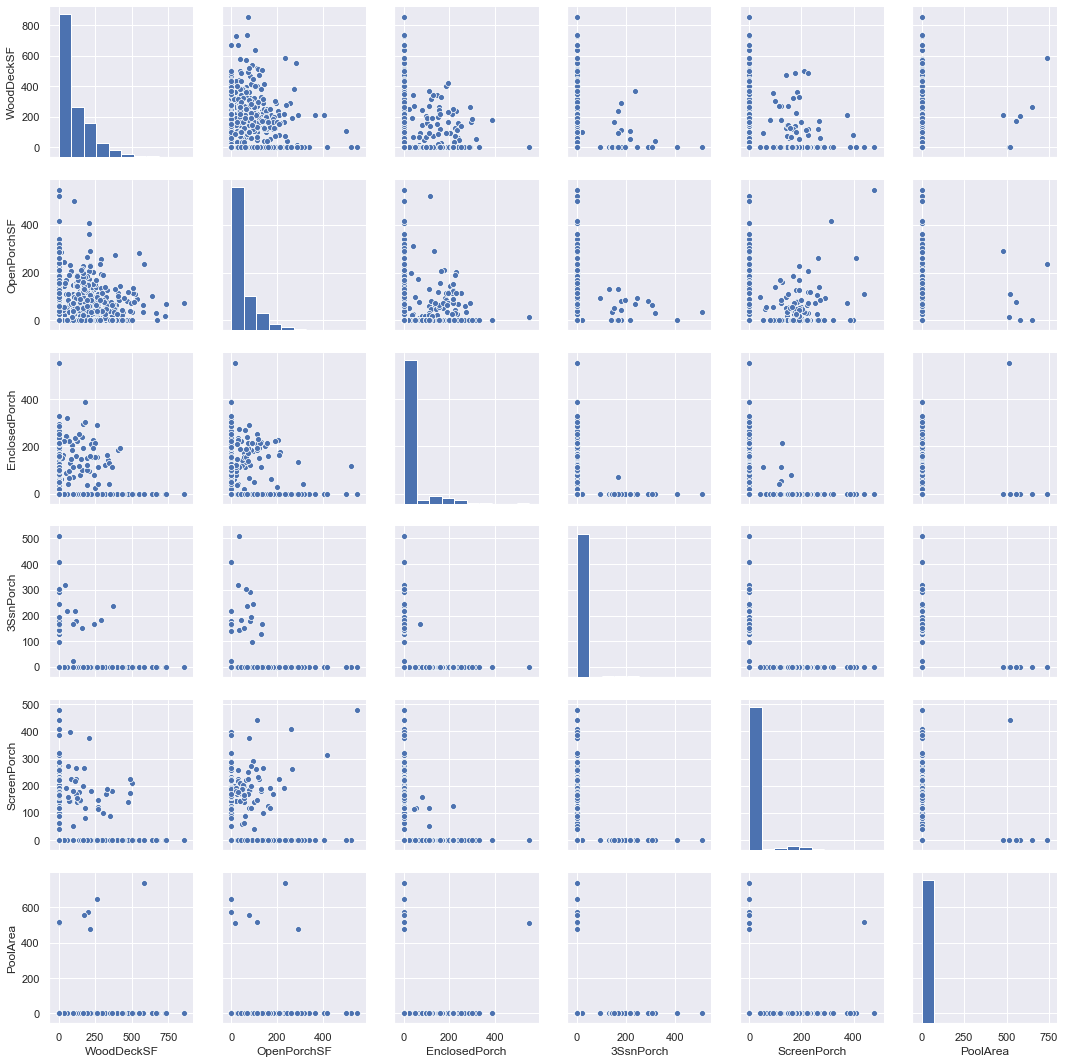

<Figure size 1440x1440 with 0 Axes>

In [113]:
#Jason function for scatterplots
sns.set()
cols = ['WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea']
sns.pairplot(df[cols], size = 2.5)
plt.show();
plt.savefig('pairplot.png',bbox_inches='tight')

In [40]:
#variables we chose
chosen2 = ['LotFrontage','LotArea','LotShape','HouseStyle',
'OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
'Heating','CentralAir','1stFlrSF','2ndFlrSF','GrLivArea',
'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'KitchenQual','Functional','Fireplaces','GarageType','GarageCars',
'GarageQual','WoodDeckSF','OpenPorchSF','PoolArea','Fence',
'SaleType','SaleCondition']
#export corr matrix to csv
fin_set = data[chosen2].copy()
c = fin_set.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv('./finalSetcorr.csv')

C:\Users\conma\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if sys.path[0] == '':


In [177]:
fin_set.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,PoolArea
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,...,0.425342,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,2.758904
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,438.705324,386.587738,436.528436,...,0.518911,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,40.177307
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,...,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,728.000000,...,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,...,3.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,738.000000


In [188]:
#show distribution of set
sets = ['LotShape',
'Neighborhood',
'HouseStyle',
'Heating',
'CentralAir',
'KitchenQual',
'Functional',
'GarageType',
'GarageQual',
'Fence',
'SaleType',
'SaleCondition']

#Jaye function to count unique values
for c in data.columns[:]:
    if c in sets:
        print('\nCOLUMN: "{}"\n=============================='.format(c))
        print(data[c].value_counts(dropna=False).to_string())
        # only include above columns categorical
        continue


COLUMN: "LotShape"
Reg    925
IR1    484
IR2     41
IR3     10

COLUMN: "Neighborhood"
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2

COLUMN: "HouseStyle"
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8

COLUMN: "Heating"
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1

COLUMN: "CentralAir"
Y    1365
N      95

COLUMN: "KitchenQual"
TA    735
Gd    586
Ex    100
Fa     39

COLUMN: "Functional"
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1

COLUMN: "GarageType"
Attchd     870
Detchd     387
BuiltIn     88
NaN         81


In [77]:
#lasso reg vizualization for many lamdas
def lassoReg (alphas, df, target):

    lasso  = Lasso()
    #alphas = np.linspace(0.1,20.1,20)
    lasso.set_params(normalize=False)
    coefs_lasso  = []

    for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(df, target)  
        coefs_lasso.append(lasso.coef_)

    coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = df.columns)  
    #coefs_lasso.head()
    
    plt.rcParams['figure.figsize'] = (20,20)
    for name in coefs_lasso.columns:
        plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
        
        
    plt.xlabel(r'hyperparameter $\lambda$')
    plt.ylabel(r'slope values')
    plt.legend(loc=1)

In [41]:
#elastisc net vizualization graph for many lambdas
def elasticNet (alphas, df, target, rho):

    elasticnet = ElasticNet()
    elasticnet.set_params(normalize=False)
    coefs_model  = []
    #run through many alphas(lambdas)
    for alpha in alphas:
        elasticnet.set_params(alpha=alpha, l1_ratio= rho)
        elasticnet.fit(df, target)  
        coefs_model.append(elasticnet.coef_)

    coefs_model = pd.DataFrame(coefs_model, index = alphas, columns = df.columns)  
    
    #plot all the figures for different lambda
    plt.rcParams['figure.figsize'] = (20,20)
    for name in coefs_model.columns:
        plt.plot(coefs_model.index, coefs_model[name], label=name)
            
    plt.xlabel(r'hyperparameter $\lambda$')
    plt.ylabel(r'slope values')
    plt.legend(loc=1)

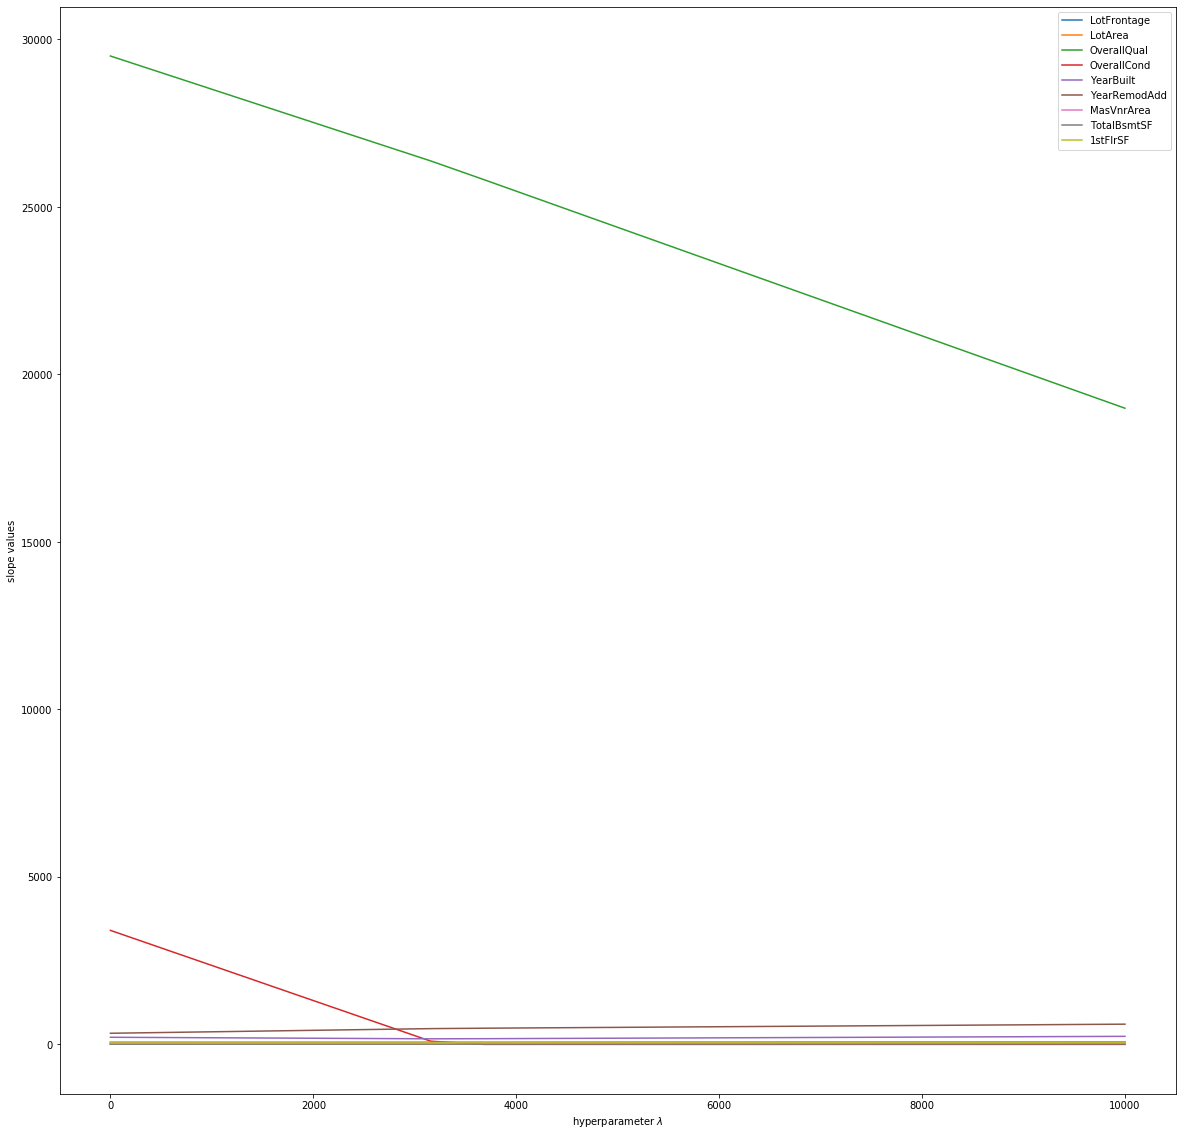

In [46]:
#lambda
alphas = np.linspace(0.1,1e4,20)
#target
prices = pd.Series(df.SalePrice)

#numerical dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2 = fin_set.select_dtypes(include=numerics).copy() #81 na in GarageYrBlt
df2.isna().sum() #count nas per col
df2.LotFrontage.fillna(0, inplace=True) # replace na with 0 because no data given
df2.MasVnrArea.fillna(0, inplace=True)
#df2 has 25 columns, 10 unique colors for elasticNet

elasticNet(alphas,df2.iloc[:,:9],prices,1) #1 for lasso, 0 for ridge, mixture is elastic net

In [ ]:
#returns elasticNet based on one lambda
def elasticNetModel (alpha, df, target, rho):
    
    elasticnet = ElasticNet()
    elasticnet.set_params(normalize=True)
    model = elassticnet.fit(df,target)
    return model

In [57]:
#knn attempt
X_train = final_set.loc[:,"LotFrontage":"LotArea"].copy()
X_train
X_train.fillna(0,inplace=True)
#X_train.isna().sum()
y_train = data.SalePrice.copy()
y_train
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
y_pred

array([142000, 119000, 148000, ..., 120000, 104900, 128000], dtype=int64)

In [161]:
#find numeric columns in given df,replace missing rows with column mean, return dataframe
def num_cleaner (df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    cl_df = pd.DataFrame()

    df2 = df.select_dtypes(include=numerics).copy() #only numeric columns
    nullCols = df2.isnull() #df of T/F, T if null (bool mask)
    means = df2.mean() #series of mean per column

    for c in df2:
        for r in range(0,len(df2)-1):
            if df2[c].iloc[r] and nullCols[c].iloc[r]:
                df2[c].iloc[r] = means[c]
                #print(df2[c].iloc[r]) sanity check, last 8 should be 103.685 for MasVnrArea

    cl_df = df2.copy() #this will return only numeric features, need to add back type ob features after cleaning/dummify them
    return cl_df

#df2.isnull().any() #check to see if it worked

In [190]:
#dummify object columns and return dataframe
def mass_dummify (df):
    df2 = df.select_dtypes(include=object).copy()
    dum_df = pd.get_dummies(df2) #currently 86 columns 
    return dum_df

<class 'pandas.core.frame.DataFrame'>


In [ ]:
num_clean = num_cleaner(fin_set).copy()
#cleaned
ob_clean = mass_dummify(fin_set).copy()
#combine num & ob dataset
cl_df = pd.concat([num_clean,ob_clean],axis=1)

In [169]:
#linear regression
ols = LinearRegression()
X = data[chosen2].copy()
y = data["SalePrice"]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3)

model = ols.fit(X_train,Y_train)


ValueError: could not convert string to float: 'Reg'

In [167]:
X = data[chosen2].copy()  #Feature Matrix
#X.drop(['SalePrice'], inplace=True, axis=1)
y = data["SalePrice"] #Target Variable
#Fitting sm.OLS model
#ols
model = ols.fit(y,X)#.fit()
#model.summary()
#model.predict()
#rms = sqrt(mean_squared_error(y_actual, y_predicted)) model

pandas.core.series.Series

In [192]:
#cross validation -work in prog-
# divide into 3 parts
ms_k3 = KFold(n_splits=3)
sample = df
for train_idx, val_idx in ms_k3.split(sample): 
    print('Train:', train_idx, 'Validation:', val_idx)

Train: [ 487  488  489  490  491  492  493  494  495  496  497  498  499  500
  501  502  503  504  505  506  507  508  509  510  511  512  513  514
  515  516  517  518  519  520  521  522  523  524  525  526  527  528
  529  530  531  532  533  534  535  536  537  538  539  540  541  542
  543  544  545  546  547  548  549  550  551  552  553  554  555  556
  557  558  559  560  561  562  563  564  565  566  567  568  569  570
  571  572  573  574  575  576  577  578  579  580  581  582  583  584
  585  586  587  588  589  590  591  592  593  594  595  596  597  598
  599  600  601  602  603  604  605  606  607  608  609  610  611  612
  613  614  615  616  617  618  619  620  621  622  623  624  625  626
  627  628  629  630  631  632  633  634  635  636  637  638  639  640
  641  642  643  644  645  646  647  648  649  650  651  652  653  654
  655  656  657  658  659  660  661  662  663  664  665  666  667  668
  669  670  671  672  673  674  675  676  677  678  679  680  681  682